In [13]:
import jiwer
from pathlib import Path
import matplotlib.pyplot as plt

In [14]:
base_directory = Path.cwd().parent

dataset_name = "yale/econ251"
data_directory = base_directory / 'data'

transcripts_directory = data_directory / 'inputs' / dataset_name / 'transcripts'
predictions_directory = data_directory / 'predictions' / dataset_name

In [16]:
print(predictions_directory)

/home/hvwesten/Projects/uni/ASR/asr-transcribe-lecture/data/predictions/yale/econ251


In [17]:
transformation = jiwer.Compose([
    jiwer.ToUpperCase(),
    jiwer.RemoveWhiteSpace(replace_by_space=True),
    jiwer.RemoveMultipleSpaces(),
    jiwer.RemovePunctuation(),
    jiwer.ReduceToListOfListOfWords(word_delimiter=" ")
])

In [21]:
errors = []

count = 0

for transcript in transcripts_directory.glob('*.txt'):

    print(transcript)
    # load the ground truth text
    with open(transcript, 'r') as f:
        ground_truth = f.read()


    # load the predicted text
    # prediction = range()
    pred_file_name = transcript.stem + 'esp'
    pred_file_path = (predictions_directory / pred_file_name).with_suffix('.txt')

    print(f"{pred_file_path=}")
    # with open(prediction, 'r') as f:
    #     hypothesis = f.read()
    #
    #
    # # calculate the WER using the defined transformation
    # error = jiwer.wer(
    #     ground_truth,
    #     hypothesis,
    #     truth_transform=transformation,
    #     hypothesis_transform=transformation
    # )
    # errors.append(error)


/home/hvwesten/Projects/uni/ASR/asr-transcribe-lecture/data/inputs/yale/econ251/transcripts/01.txt
pred_file_path=PosixPath('/home/hvwesten/Projects/uni/ASR/asr-transcribe-lecture/data/predictions/yale/econ251/01esp.txt')


In [ ]:
for

In [10]:
errors

[]

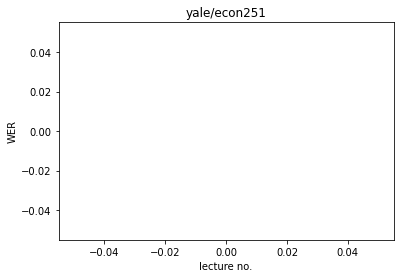

In [9]:
xrange = [i for i in range(len(errors))]

plt.plot(xrange, errors)

plt.title(f"{dataset_name}")
plt.xlabel("lecture no.")
plt.ylabel("WER")
plt.show()

[0.32115429369327436, 0.31037157706927315, 0.3095182685594601, 0.3038554029943371]
[262, 268, 298, 377]


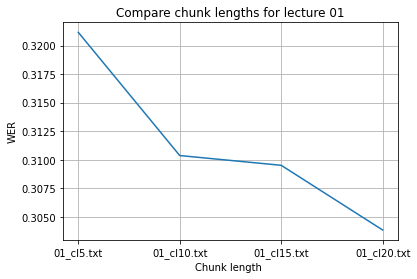

In [36]:
## Compare chunk lengths

ground_truth_file = transcripts_directory / "01.txt"
with open(ground_truth_file, 'r') as f:
    ground_truth = f.read()


predicted_texts = ["01_cl5.txt", "01_cl10.txt", "01_cl15.txt", "01_cl20.txt"]
errors = []
#
for pred in predicted_texts:
    file_path = predictions_directory / pred

    with open(file_path, 'r') as f:
        hypothesis = f.read()

    error = jiwer.wer(
        ground_truth,
        hypothesis,
        truth_transform=transformation,
        hypothesis_transform=transformation
    )
    errors.append(error)

time_taken = [262, 268, 298, 377 ] # in seconds

print(errors)
print(time_taken)

plt.plot(predicted_texts, errors)
plt.title(f"Compare chunk lengths for lecture 01")
plt.xlabel("Chunk length ")
plt.ylabel("WER")
plt.grid()
plt.show()